In [ ]:
# Upload kaggle.json
from google.colab import files
files.upload()

# Setup Kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle -q

# Download and unzip competition data
!kaggle competitions download -c ait-511-course-project-1-obesity-risk
!unzip -q ait-511-course-project-1-obesity-risk.zip -d data

!kaggle datasets download -d aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster
!unzip -q obesity-or-cvd-risk-classifyregressorcluster.zip -d data

Saving kaggle.json to kaggle.json
  0% 0.00/570k [00:00<?, ?B/s]
100% 570k/570k [00:00<00:00, 779MB/s]
Dataset URL: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster
License(s): CC-BY-SA-4.0
  0% 0.00/57.5k [00:00<?, ?B/s]
100% 57.5k/57.5k [00:00<00:00, 149MB/s]


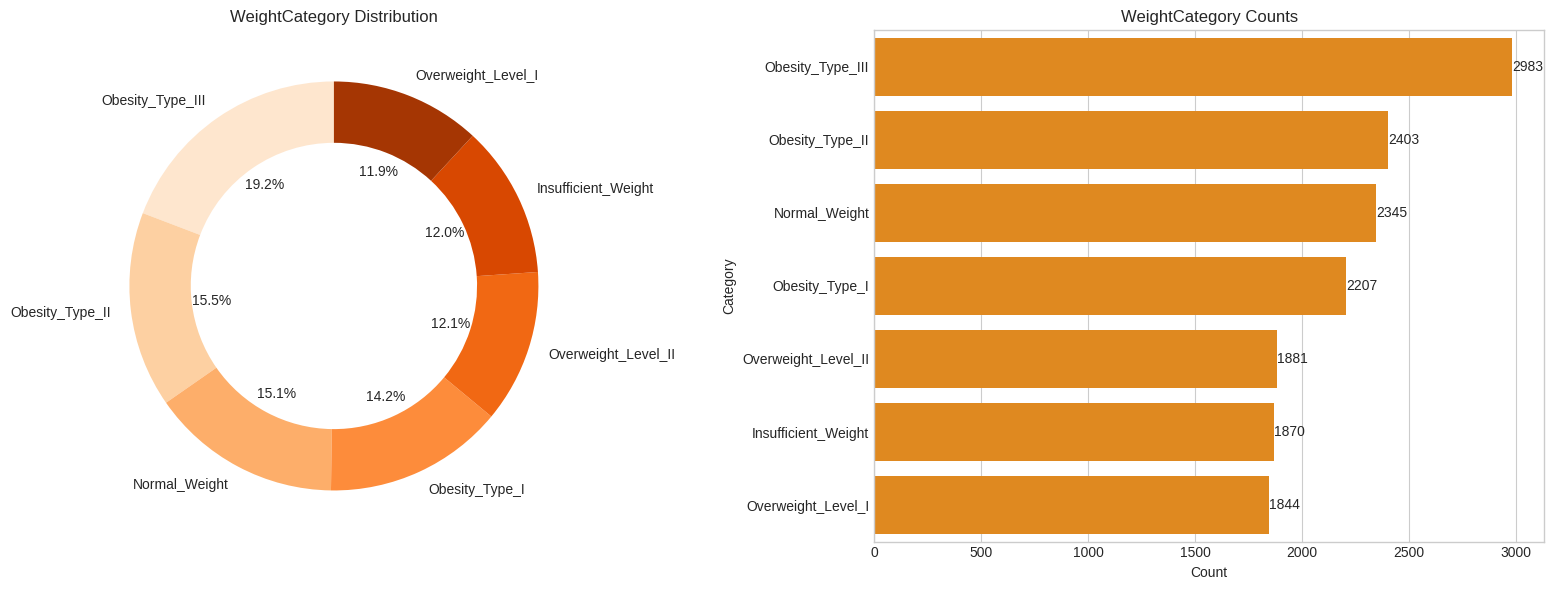


WeightCategory: 'Obesity_Type_III' is the most common category (19.2%)
--------------------------------------------------------------------------------


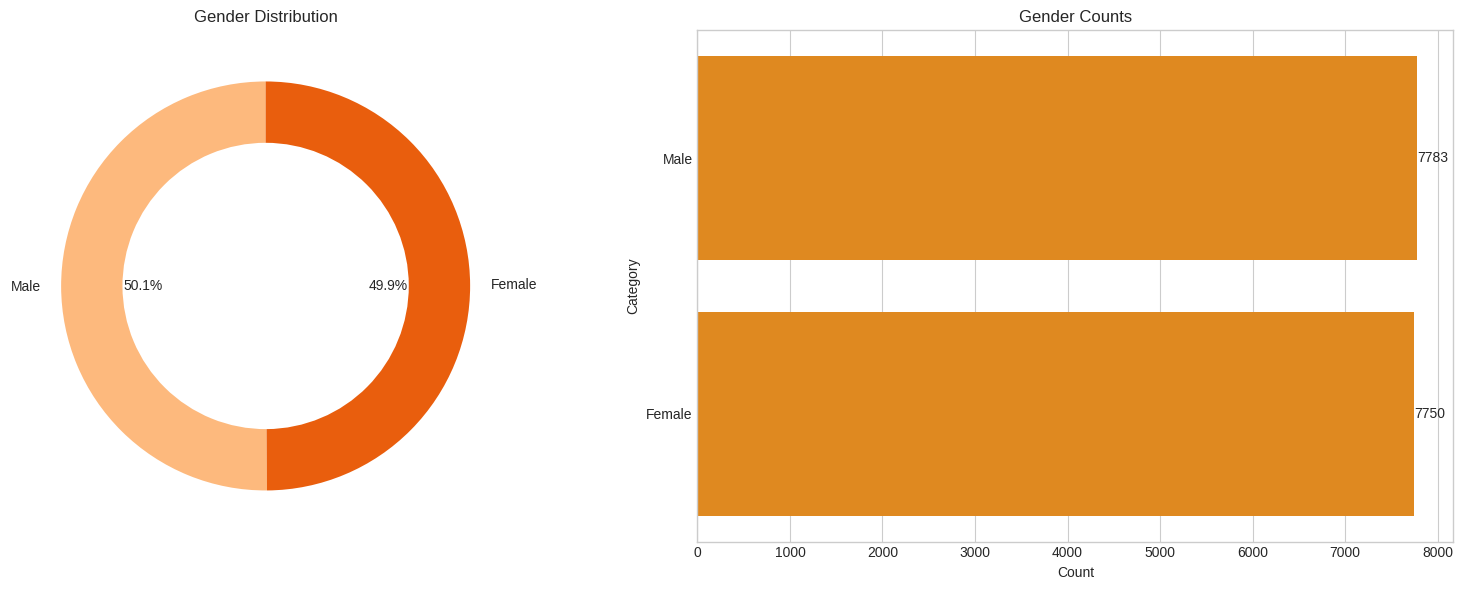


Gender: 50.1% of dataset belongs to 'Male', 49.9% belongs to 'Female'
--------------------------------------------------------------------------------


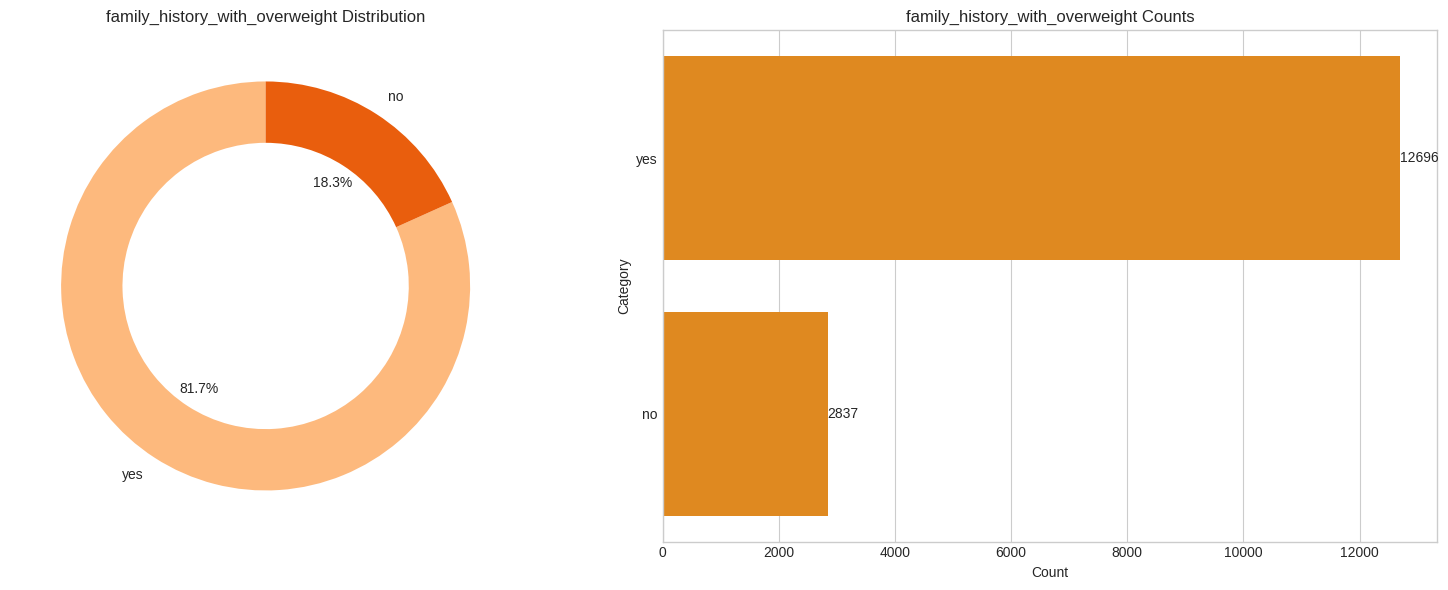


family_history_with_overweight: 81.7% of dataset belongs to 'yes', 18.3% belongs to 'no'
--------------------------------------------------------------------------------


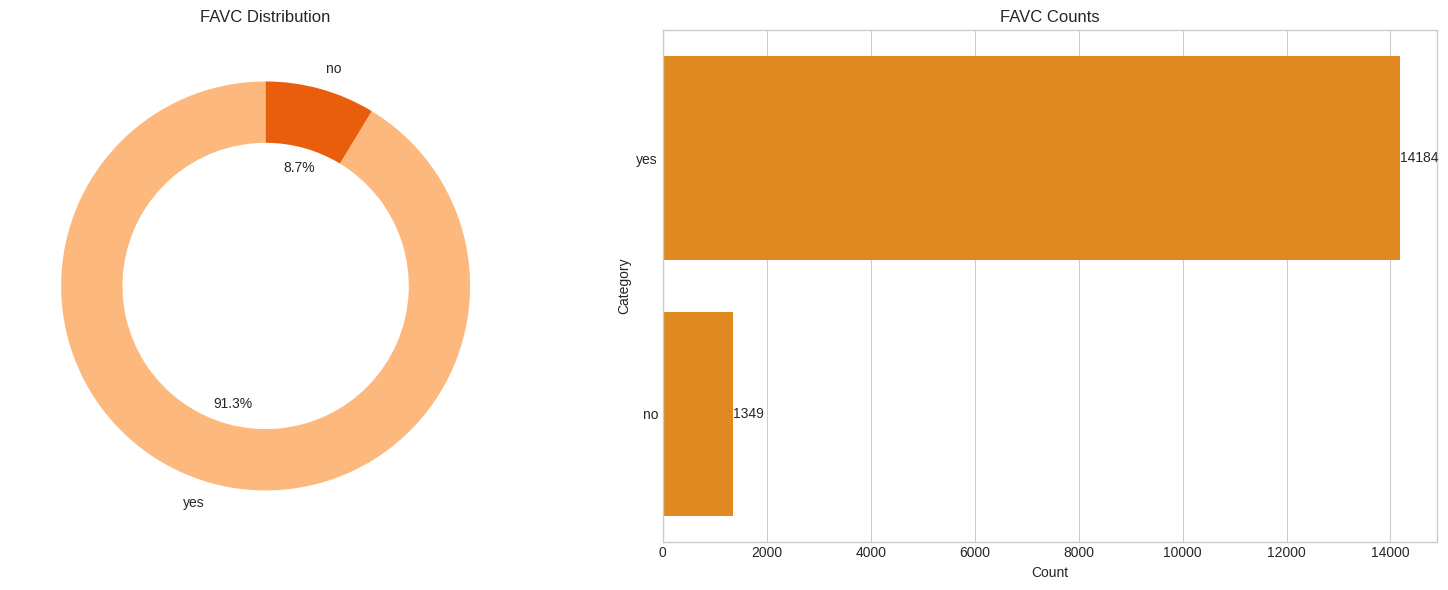


FAVC: 91.3% of dataset belongs to 'yes', 8.7% belongs to 'no'
--------------------------------------------------------------------------------


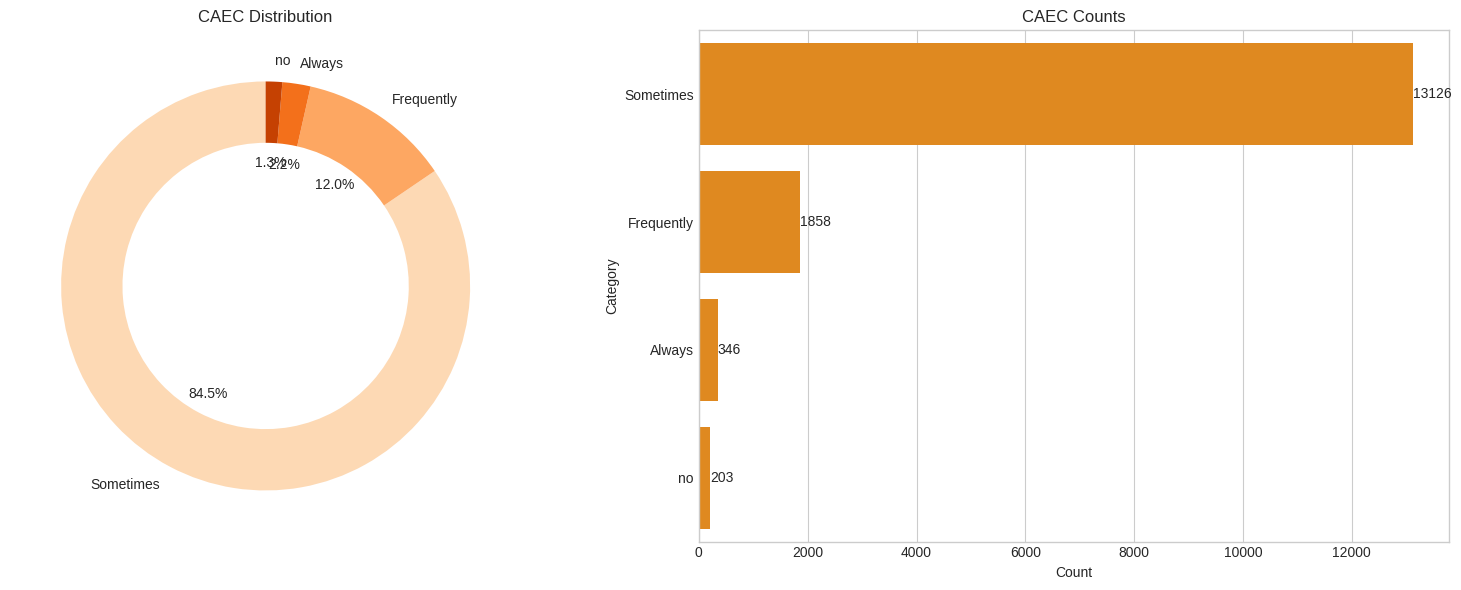


CAEC: 'Sometimes' is the most common category (84.5%)
--------------------------------------------------------------------------------


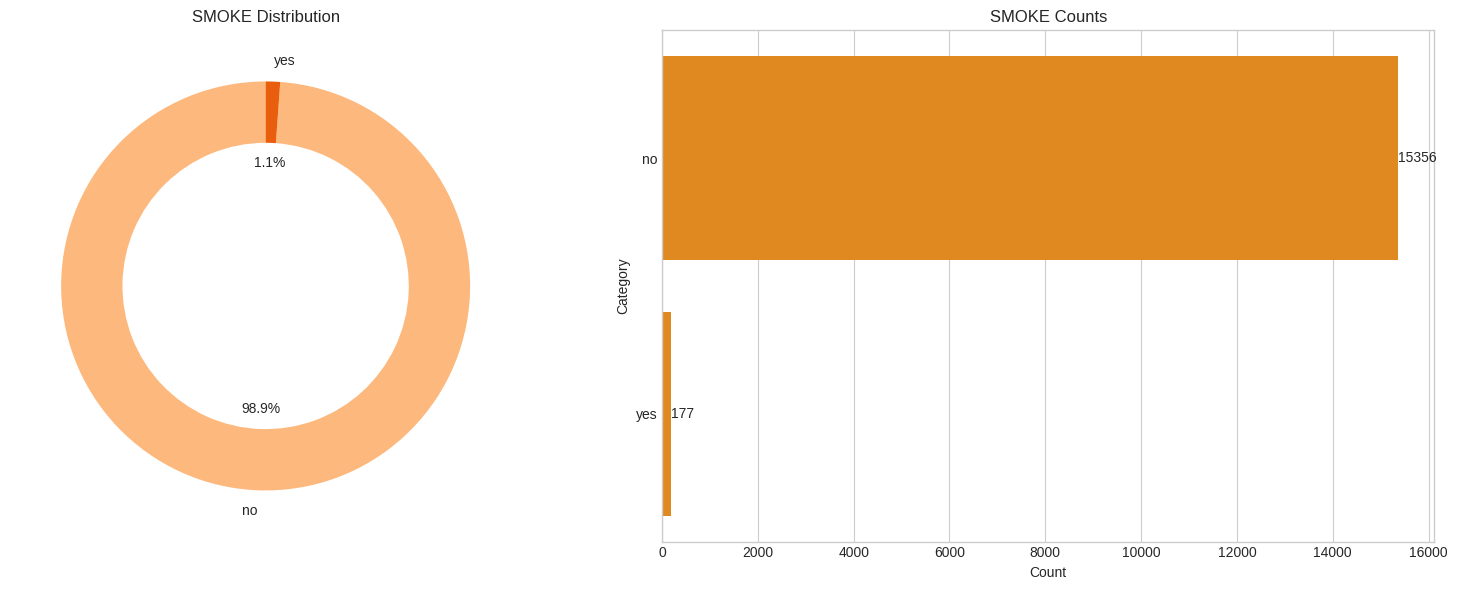


SMOKE: 98.9% of dataset belongs to 'no', 1.1% belongs to 'yes'
--------------------------------------------------------------------------------


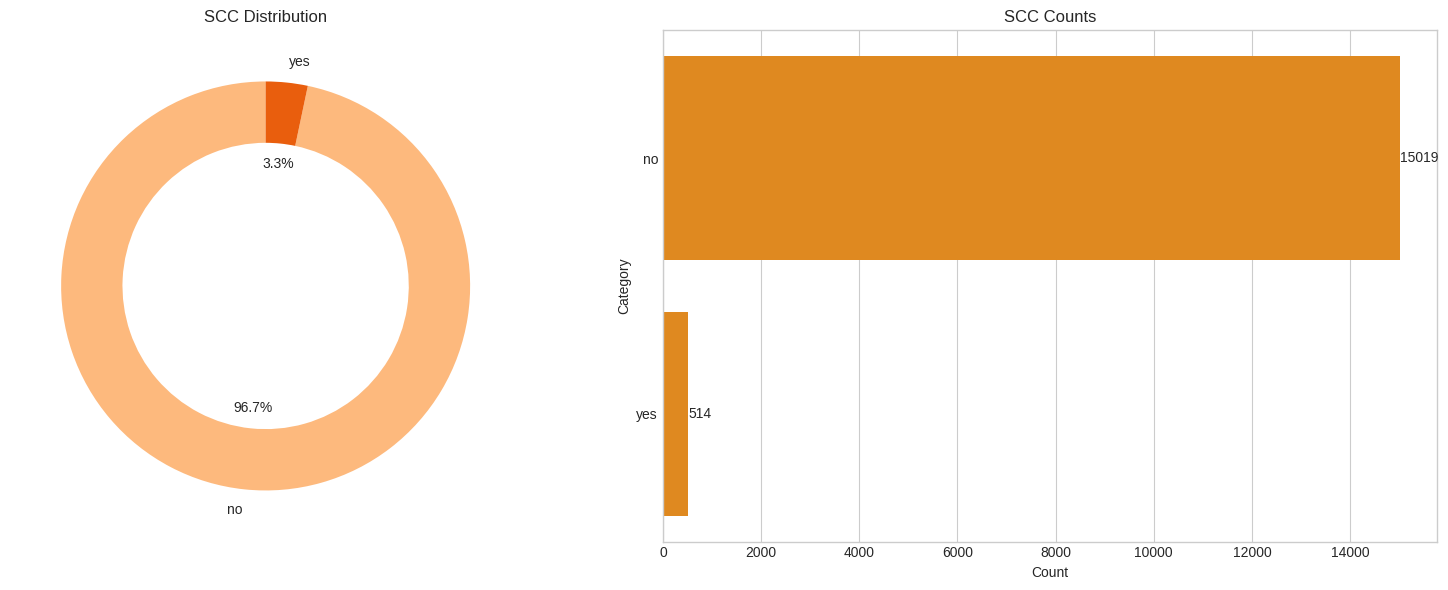


SCC: 96.7% of dataset belongs to 'no', 3.3% belongs to 'yes'
--------------------------------------------------------------------------------


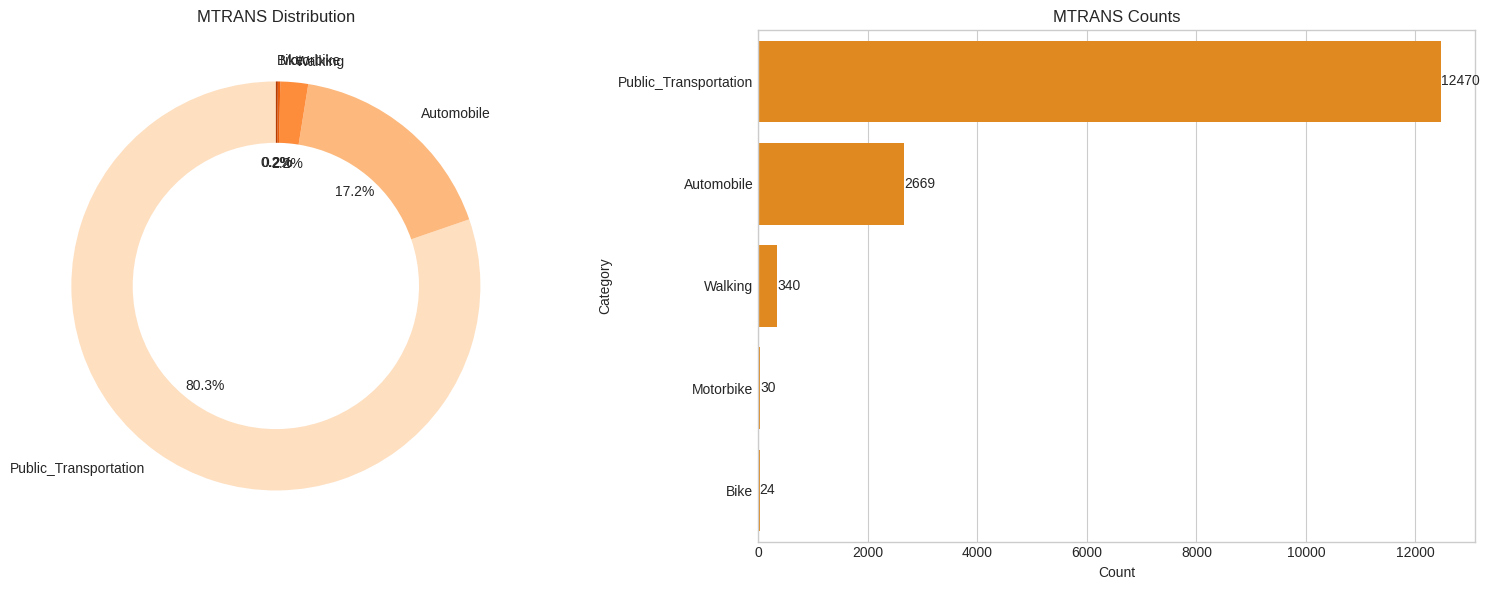


MTRANS: 'Public_Transportation' is the most common category (80.3%)
--------------------------------------------------------------------------------


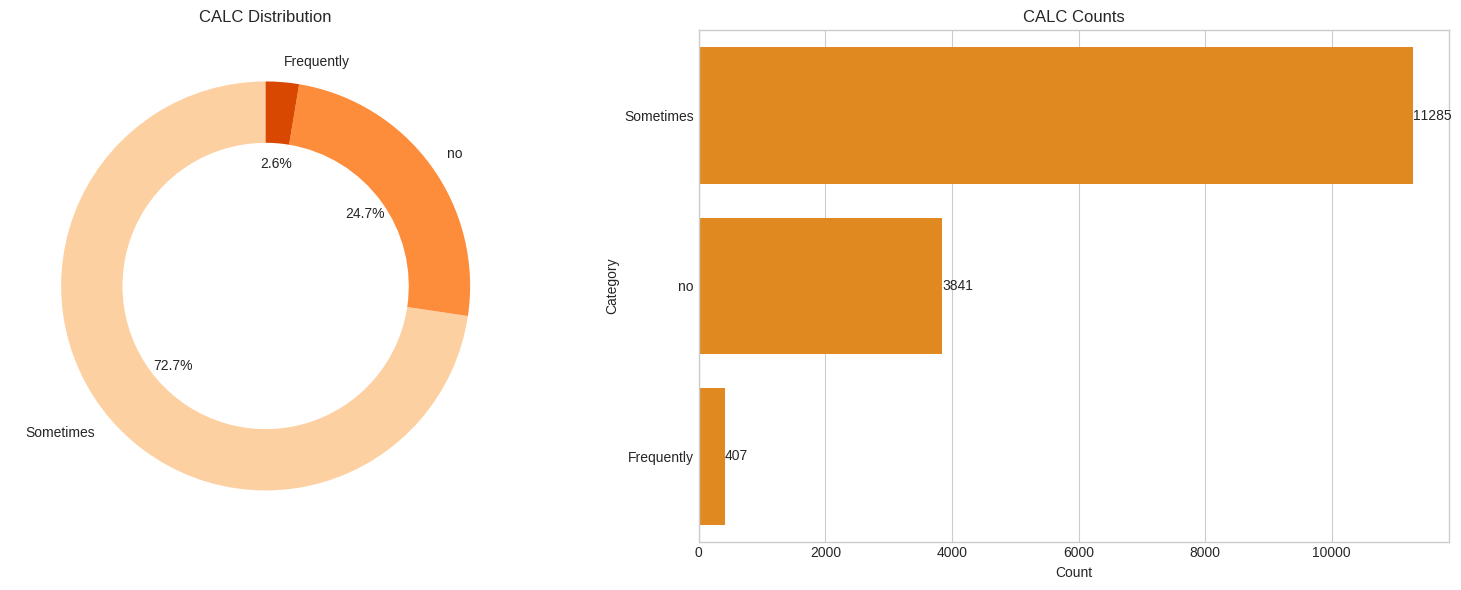


CALC: 'Sometimes' is the most common category (72.7%)
--------------------------------------------------------------------------------


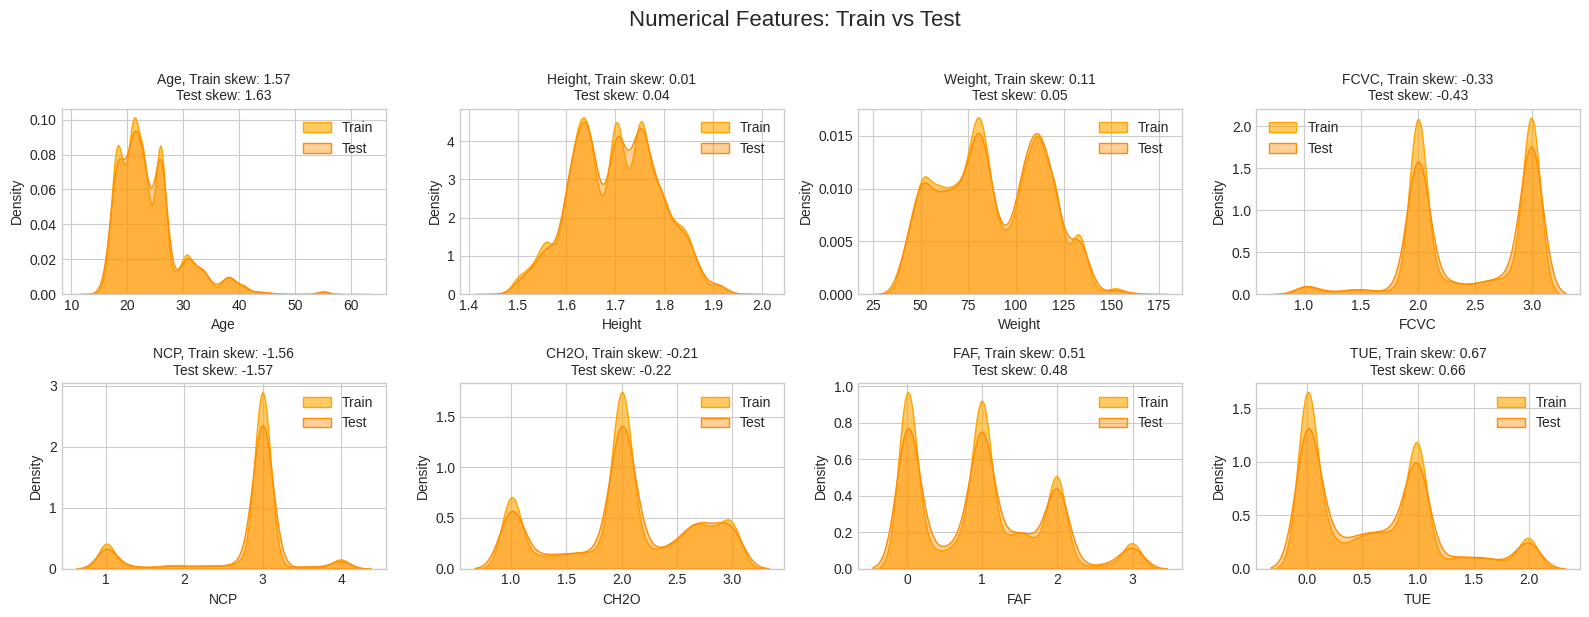


☉ Numerical features distribution plotted. Train vs Test KDEs compared.



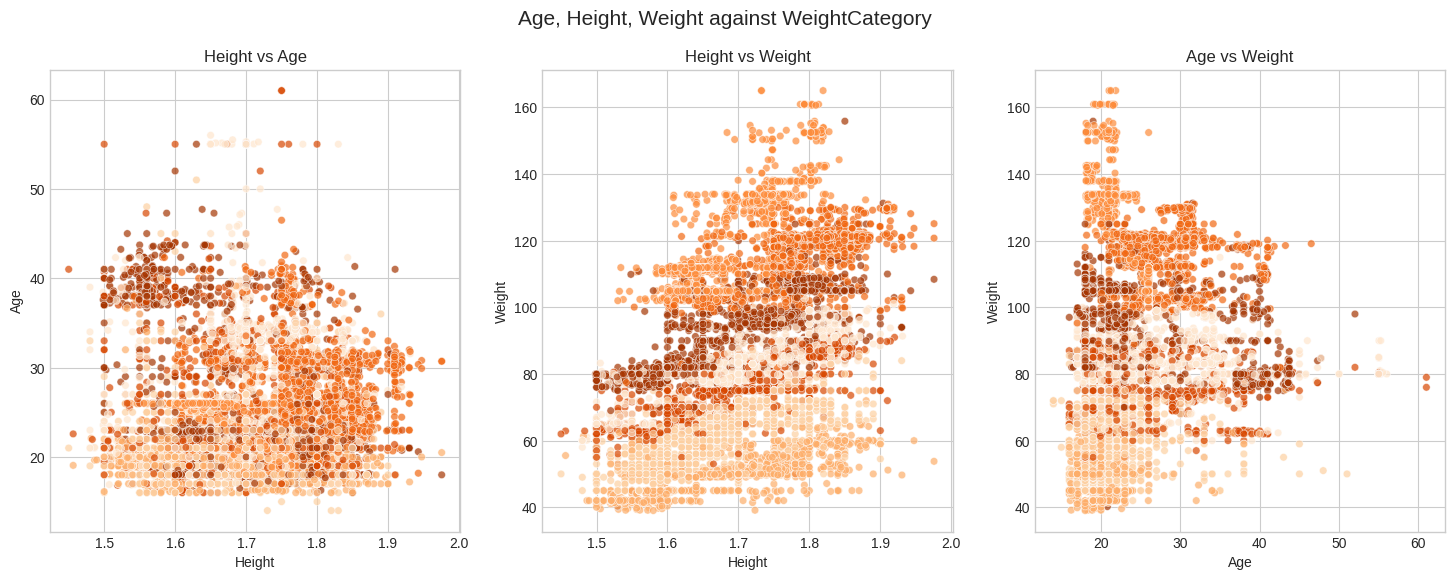


☉ Scatter plots for Age, Height, Weight vs WeightCategory plotted.



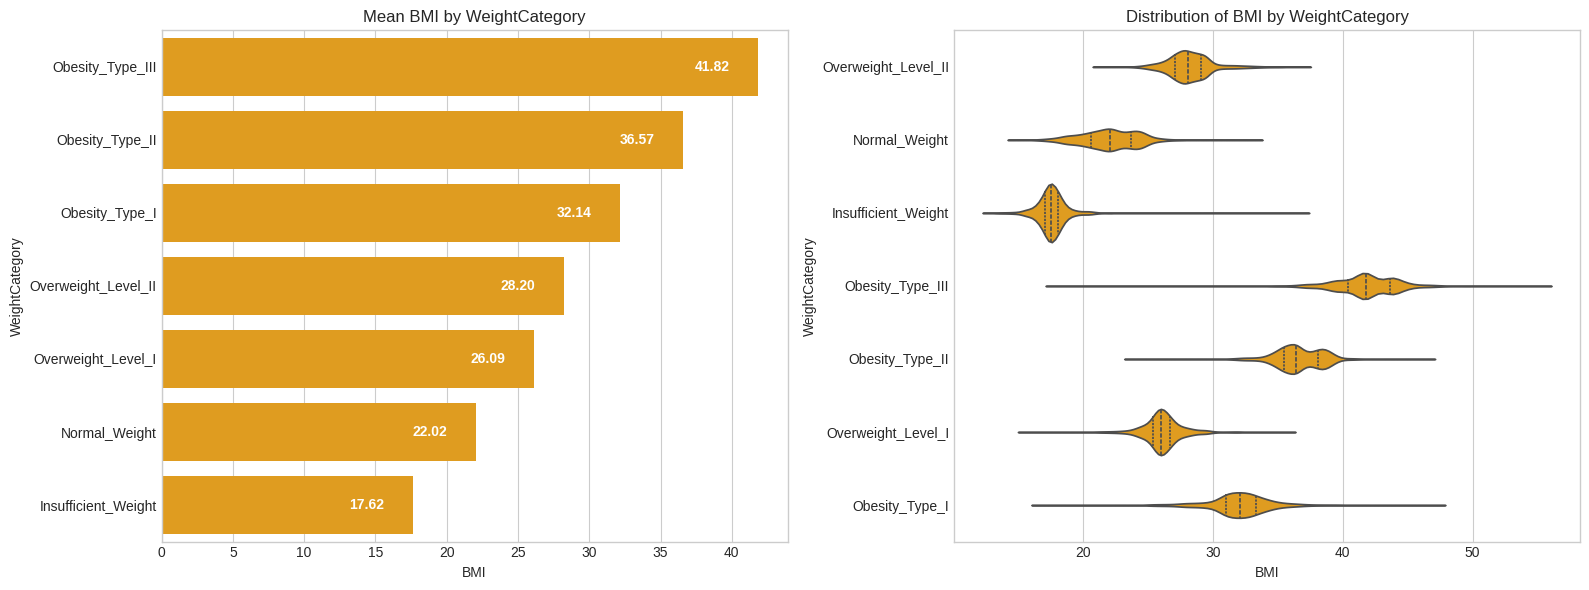


☉ BMI analysis plotted.



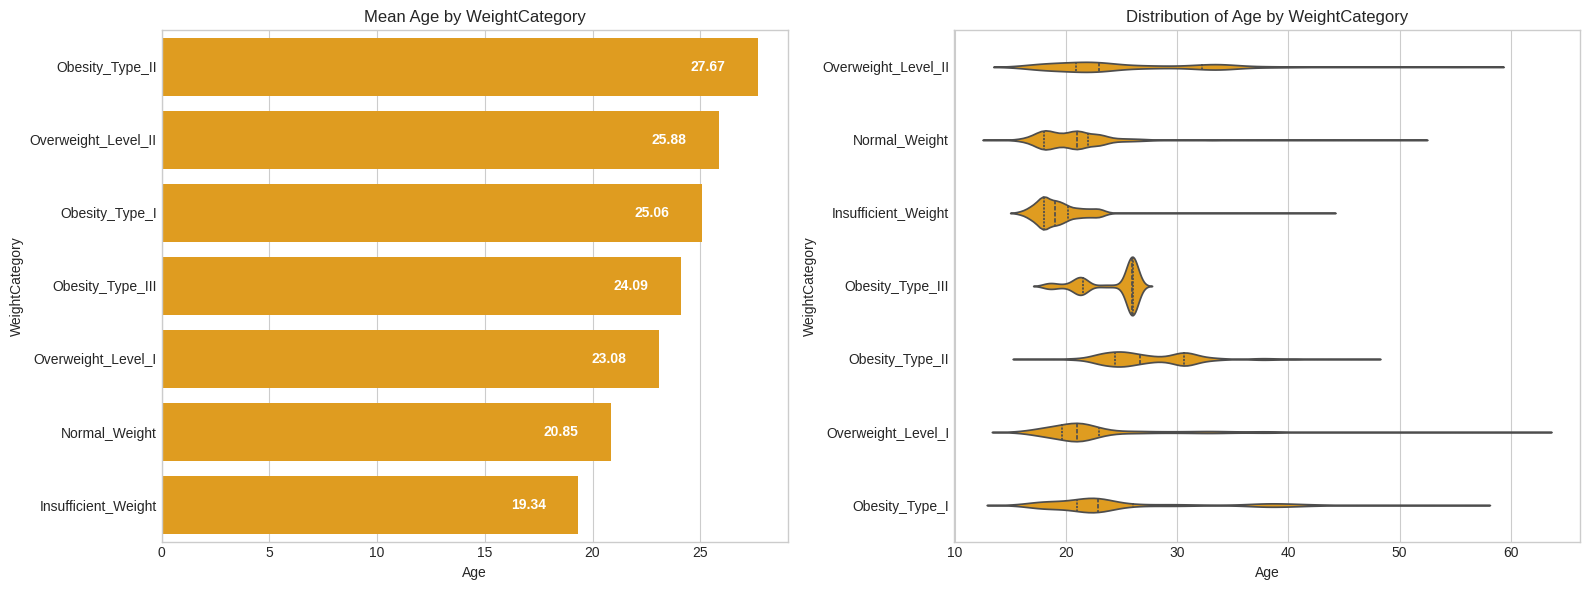


☉ Age analysis by WeightCategory plotted.



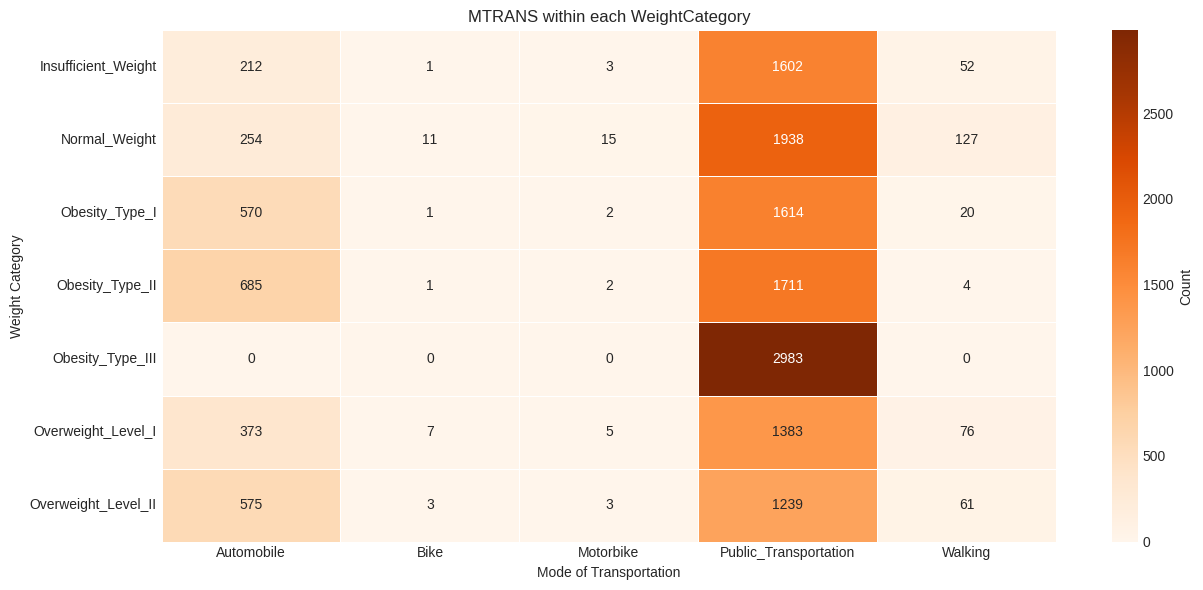


☉ Heatmap of WeightCategory vs MTRANS plotted.



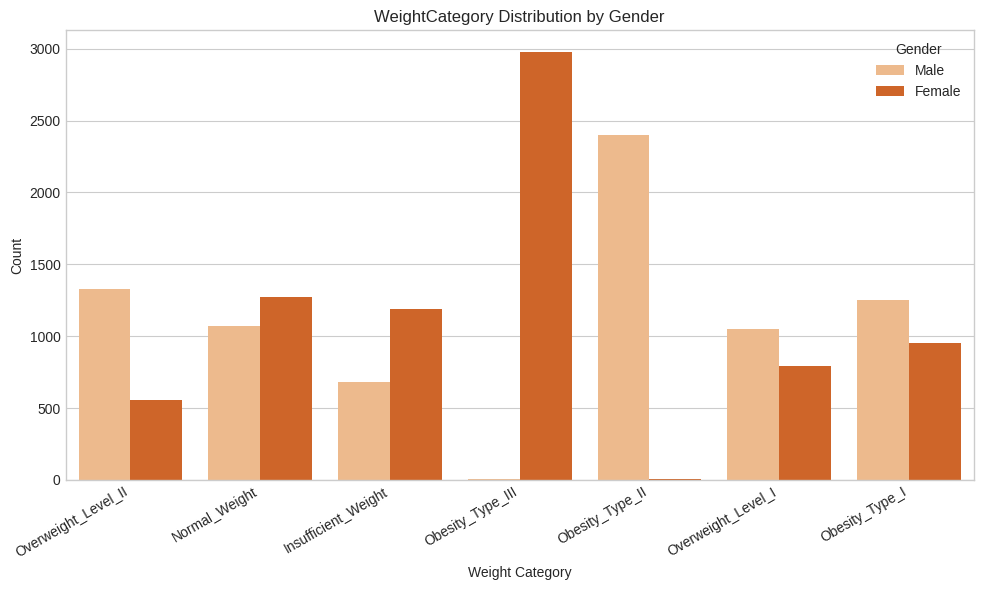


☉ WeightCategory vs Gender plotted.



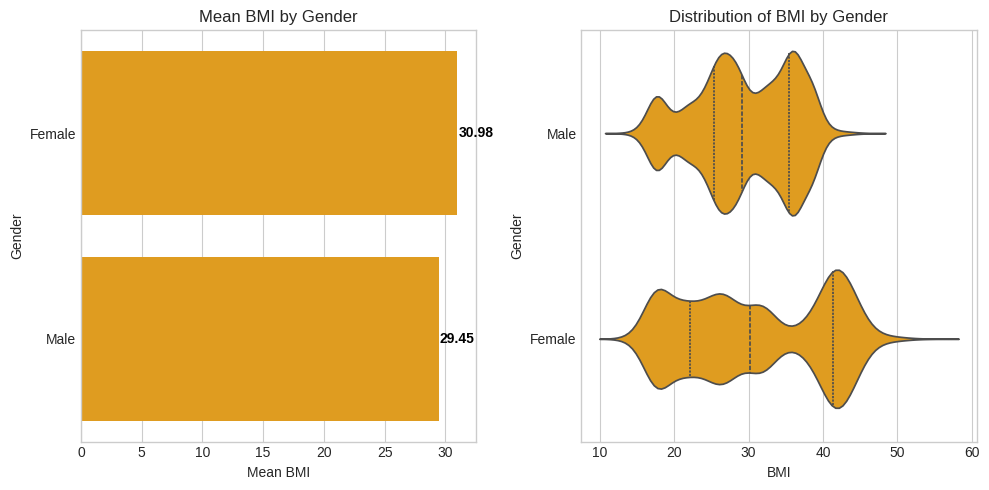


☉ BMI by Gender plotted.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

# ==============================
# Load datasets
# ==============================
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Columns
categorical_columns = ["WeightCategory", "Gender", "family_history_with_overweight",
                       "FAVC", "CAEC", "SMOKE", "SCC", "MTRANS", "CALC"]
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# ==============================
# 1. Categorical Columns
# ==============================
for col in categorical_columns:
    counts = train[col].value_counts()
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Pie chart with orange tones
    colors = sns.color_palette("Oranges", len(counts))
    axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%',
                startangle=90, wedgeprops={'width':0.3}, colors=colors)
    axes[0].set_title(f"{col} Distribution")

    # Horizontal bar chart (orange)
    sns.barplot(x=counts.values, y=counts.index, color='darkorange', ax=axes[1])
    for idx, val in enumerate(counts.values):
        axes[1].text(val + 0.5, idx, str(val), va='center')
    axes[1].set_title(f"{col} Counts")
    axes[1].set_xlabel("Count")
    axes[1].set_ylabel("Category")

    plt.tight_layout()
    plt.show()

    # Print summary
    total = counts.sum()
    top_cat = counts.index[0]
    top_pct = counts.iloc[0] / total * 100
    if len(counts) == 2:
        other_cat = counts.index[1]
        print(f"\n{col}: {top_pct:.1f}% of dataset belongs to '{top_cat}', {100-top_pct:.1f}% belongs to '{other_cat}'")
    else:
        print(f"\n{col}: '{top_cat}' is the most common category ({top_pct:.1f}%)")
    print("-"*80)

# ==============================
# 2. Numerical Columns
# ==============================
rows, cols = 2, 4
plt.figure(figsize=(4 * cols, 3 * rows))
plt.suptitle("Numerical Features: Train vs Test", fontsize=16, y=1.02)

for i, col in enumerate(numeric_columns):
    plt.subplot(rows, cols, i + 1)
    sns.kdeplot(train[col], fill=True, label="Train", color='orange', alpha=0.6)
    sns.kdeplot(test[col], fill=True, label="Test", color='darkorange', alpha=0.4)
    plt.title(f"{col}, Train skew: {train[col].skew():.2f}\nTest skew: {test[col].skew():.2f}", fontsize=10)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
plt.tight_layout()
plt.show()
print("\n☉ Numerical features distribution plotted. Train vs Test KDEs compared.\n")

# ==============================
# 3. Scatter Plots: Height, Weight, Age
# ==============================
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(data=train, x='Height', y='Age', hue='WeightCategory', palette='Oranges', alpha=0.7, s=30, ax=axes[0])
axes[0].set_title('Height vs Age')

sns.scatterplot(data=train, x='Height', y='Weight', hue='WeightCategory', palette='Oranges', alpha=0.7, s=30, ax=axes[1])
axes[1].set_title('Height vs Weight')

sns.scatterplot(data=train, x='Age', y='Weight', hue='WeightCategory', palette='Oranges', alpha=0.7, s=30, ax=axes[2])
axes[2].set_title('Age vs Weight')

for ax in axes:
    ax.legend_.remove()

plt.suptitle('Age, Height, Weight against WeightCategory', fontsize=15)
plt.show()
print("\n☉ Scatter plots for Age, Height, Weight vs WeightCategory plotted.\n")

# ==============================
# 4. BMI Analysis
# ==============================
train['BMI'] = train['Weight'] / (train['Height'] ** 2)
bmi_means = train.groupby('WeightCategory')['BMI'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x=bmi_means.values, y=bmi_means.index, color='orange', ax=axes[0])
axes[0].set_title('Mean BMI by WeightCategory')
axes[0].set_xlabel('BMI')
for i, val in enumerate(bmi_means.values):
    axes[0].text(val - 2, i, f"{val:.2f}", ha='right', va='center', color='white', fontweight='bold')

sns.violinplot(data=train, y='WeightCategory', x='BMI', inner='quartile', color='orange', ax=axes[1])
axes[1].set_title('Distribution of BMI by WeightCategory')
axes[1].set_xlabel('BMI')
plt.tight_layout()
plt.show()
print("\n☉ BMI analysis plotted.\n")

# ==============================
# 5. Age Analysis by WeightCategory
# ==============================
age_means = train.groupby('WeightCategory')['Age'].mean().sort_values(ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x=age_means.values, y=age_means.index, color='orange', ax=axes[0])
axes[0].set_title('Mean Age by WeightCategory')
axes[0].set_xlabel('Age')
for i, val in enumerate(age_means.values):
    axes[0].text(val - 1.5, i, f"{val:.2f}", ha='right', va='center', color='white', fontweight='bold')

sns.violinplot(data=train, y='WeightCategory', x='Age', inner='quartile', color='orange', ax=axes[1])
axes[1].set_title('Distribution of Age by WeightCategory')
axes[1].set_xlabel('Age')
plt.tight_layout()
plt.show()
print("\n☉ Age analysis by WeightCategory plotted.\n")

# ==============================
# 6. WeightCategory vs MTRANS
# ==============================
mtrans_table = pd.crosstab(train['WeightCategory'], train['MTRANS'])
plt.figure(figsize=(13,6))
sns.heatmap(mtrans_table, annot=True, fmt='d', cmap='Oranges', linewidths=0.5, cbar_kws={'label':'Count'})
plt.title('MTRANS within each WeightCategory')
plt.xlabel('Mode of Transportation')
plt.ylabel('Weight Category')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
print("\n☉ Heatmap of WeightCategory vs MTRANS plotted.\n")

# ==============================
# 7. WeightCategory vs Gender
# ==============================
plt.figure(figsize=(10,6))
sns.countplot(data=train, x='WeightCategory', hue='Gender', palette='Oranges', dodge=True)
plt.title('WeightCategory Distribution by Gender')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()
print("\n☉ WeightCategory vs Gender plotted.\n")

# ==============================
# 8. BMI by Gender
# ==============================
fig, axes = plt.subplots(1, 2, figsize=(10,5))
bmi_gender_means = train.groupby('Gender')['BMI'].mean().sort_values(ascending=False)

# Barplot
sns.barplot(y=bmi_gender_means.index, x=bmi_gender_means.values, color='orange', ax=axes[0])
axes[0].set_title('Mean BMI by Gender')
axes[0].set_xlabel('Mean BMI')
axes[0].set_ylabel('Gender')
for i, val in enumerate(bmi_gender_means.values):
    axes[0].text(val + 0.1, i, f"{val:.2f}", ha='left', va='center', color='black', fontweight='bold')

# Violin plot
sns.violinplot(data=train, y='Gender', x='BMI', inner='quartile', color='orange', ax=axes[1])
axes[1].set_title('Distribution of BMI by Gender')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Gender')

plt.tight_layout()
plt.show()
print("\n☉ BMI by Gender plotted.\n")
